<a href="https://colab.research.google.com/github/HamzaGbada/Backend/blob/master/UmojaHack_2022_Intermediate_Practice_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### Read files

In [ ]:
# Import data
train_data = pd.read_csv('train.csv')
client_data = pd.read_csv('client_data.csv')
payment_history = pd.read_csv('payment_history.csv')
policy_data = pd.read_csv('policy_data.csv')

# Inspect train Data
train_data.head()

,Policy ID,Lapse,Lapse Year
0,PID_4928TWH,?,?
1,PID_KBLLEGK,?,?
2,PID_90F0QA3,?,?
3,PID_18F3NHF,?,?
4,PID_SX4QUVO,?,?


#Check for missing values

In [ ]:
print('missing values:', train_data.isnull().sum())

missing values: Policy ID     0
Lapse         0
Lapse Year    0
dtype: int64


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51685 entries, 0 to 51684
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Policy_ID   51685 non-null  object
 1   Lapse       51685 non-null  object
 2   Lapse_Year  51685 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


# plot Target distribution


In [ ]:
train_data = train_data.rename(columns={'Policy ID': 'Policy_ID', 'Lapse Year': 'Lapse_Year'})

In [ ]:
train_data = train_data.replace(0,'?')

In [ ]:
print('missing values:', train_data.isnull().sum())

missing values: Policy_ID     0
Lapse         0
Lapse_Year    0
dtype: int64


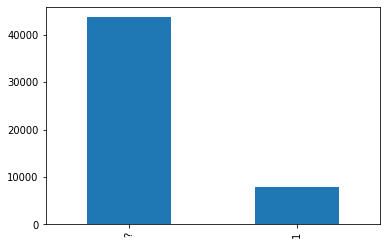

In [ ]:
train_data.Lapse.value_counts().plot(kind='bar')

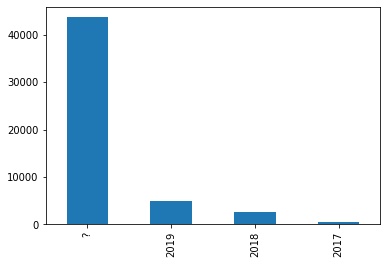

In [ ]:
train_data.Lapse_Year.value_counts().plot(kind='bar')

In [ ]:
client_data.head()

,Policy ID,NPH_TITLE,NPH_LASTNAME,NPH_SEX,NPH_BIRTHDATE,NAD_ADDRESS1,NAD_ADDRESS2
0,PID_P1UHZRT,Ms.,NaN,F,1997,ADDRESS1_WSRXQ43,ADDRESS2_AIIHWOT
1,PID_GUI5GQJ,Mr.,NPH_LASTNAME_L256UFJ,M,1954,ADDRESS1_WSRXQ43,ADDRESS2_AIIHWOT
2,PID_LECMECN,Mr.,NPH_LASTNAME_3YMQL4X,M,1923,ADDRESS1_WSRXQ43,ADDRESS2_AIIHWOT
3,PID_BCSLJHG,Mrs.,NPH_LASTNAME_IYMYRSV,F,1973,NaN,NaN
4,PID_YA1G5R6,Ms.,NPH_LASTNAME_HJ3MUUR,F,1935,ADDRESS1_WSRXQ43,ADDRESS2_AIIHWOT


In [ ]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147462 entries, 0 to 147461
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Policy ID      147462 non-null  object
 1   NPH_TITLE      147462 non-null  object
 2   NPH_LASTNAME   114816 non-null  object
 3   NPH_SEX        147462 non-null  object
 4   NPH_BIRTHDATE  147462 non-null  int64 
 5   NAD_ADDRESS1   98424 non-null   object
 6   NAD_ADDRESS2   100333 non-null  object
dtypes: int64(1), object(6)
memory usage: 7.9+ MB


In [ ]:
client_data = client_data.drop(columns=['NPH_LASTNAME', 'NAD_ADDRESS1', 'NAD_ADDRESS2'])

In [ ]:
client_data = client_data.rename(columns={'Policy ID': 'Policy_ID'})

In [ ]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147462 entries, 0 to 147461
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Policy_ID      147462 non-null  object
 1   NPH_TITLE      147462 non-null  object
 2   NPH_SEX        147462 non-null  object
 3   NPH_BIRTHDATE  147462 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
print('missing values:\n', client_data.isnull().sum())

missing values:
 Policy_ID        0
NPH_TITLE        0
NPH_SEX          0
NPH_BIRTHDATE    0
dtype: int64


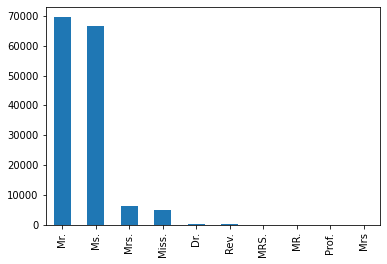

In [ ]:
client_data.NPH_TITLE.value_counts().plot(kind='bar')

In [ ]:
payment_history.head()

,Policy ID,AMOUNTPAID,DATEPAID,POSTDATE,PREMIUMDUEDATE
0,PID_VTBGKIZ,1287.423813,2018-12-29 00:00:00,2018-12-29 00:00:00,2018-01-11 00:00:00
1,PID_9J9V5YQ,0.000000,2017-04-10 00:00:00,2017-04-10 17:30:00,2017-01-10 00:00:00
2,PID_RT2SI59,3435.950888,2018-12-24 00:00:00,2018-12-28 00:00:00,2019-01-01 00:00:00
3,PID_NCXO0DU,3196.364996,2018-06-26 00:00:00,2018-06-26 00:00:00,2018-01-07 00:00:00
4,PID_FZYCT7V,0.000000,2018-03-12 00:00:00,2018-03-12 17:09:07,2018-01-12 00:00:00


In [ ]:
payment_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375801 entries, 0 to 375800
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Policy ID       375801 non-null  object 
 1   AMOUNTPAID      373372 non-null  float64
 2   DATEPAID        375801 non-null  object 
 3   POSTDATE        375800 non-null  object 
 4   PREMIUMDUEDATE  371782 non-null  object 
dtypes: float64(1), object(4)
memory usage: 14.3+ MB


In [ ]:
payment_history = payment_history.rename(columns={'Policy ID': 'Policy_ID'})

In [ ]:
print('missing values:\n', payment_history.isnull().sum())

missing values:
 Policy_ID            0
AMOUNTPAID        2429
DATEPAID             0
POSTDATE             1
PREMIUMDUEDATE    4019
dtype: int64


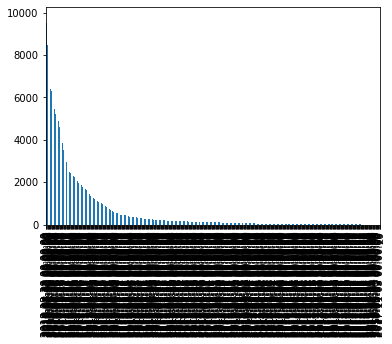

In [ ]:
payment_history.DATEPAID.value_counts().plot(kind='bar')

In [ ]:
payment_history = payment_history.drop(columns=['PREMIUMDUEDATE', 'AMOUNTPAID', 'POSTDATE'])

In [ ]:
payment_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375801 entries, 0 to 375800
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Policy_ID  375801 non-null  object
 1   DATEPAID   375801 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB


In [ ]:
policy_data.head()

,Policy ID,NP2_EFFECTDATE,PPR_PRODCD,NPR_PREMIUM,NPH_LASTNAME,CLF_LIFECD,NSP_SUBPROPOSAL,NPR_SUMASSURED,NLO_TYPE,NLO_AMOUNT,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY
0,PID_EPZDSP8,1/9/2019,PPR_PRODCD_B2KVCE7,265.724174,NPH_LASTNAME_BPN2LEB,2.0,222.0,NaN,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_APWOOPE,PCL_LOCATCODE_7SHK7I9,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB
1,PID_6M6G9IB,1/8/2018,PPR_PRODCD_64QNIHM,2795.069380,NPH_LASTNAME_U2H3GC6,1.0,111.0,213380.713197,NLO_TYPE_XTHV3A3,609.054794,AAG_AGCODE_9Z3FBGA,PCL_LOCATCODE_7VFS3EQ,OCCUPATION_IKCIDKW,CATEGORY_R821UZV
2,PID_UL0F7LH,1/8/2017,PPR_PRODCD_KOFUYNN,2492.759107,NPH_LASTNAME_B68RERV,1.0,111.0,238857.872515,NLO_TYPE_XAJI0Y6,1339.461987,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NUJZA7T,CATEGORY_8DALFYO
3,PID_TRGUBTU,1/4/2018,PPR_PRODCD_KOFUYNN,3982.538095,NPH_LASTNAME_NPN3VGI,1.0,111.0,74968.903115,NLO_TYPE_XAJI0Y6,7870.961557,AAG_AGCODE_1OCF2N0,PCL_LOCATCODE_SPQHMX5,OCCUPATION_W9XA3KX,CATEGORY_LXSLG6M
4,PID_TODLPIB,1/12/2019,PPR_PRODCD_KOFUYNN,1143.953733,NPH_LASTNAME_9VSNH0E,3.0,555.0,238857.872515,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_E31VV8B,PCL_LOCATCODE_0T6GYGX,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB


In [64]:
policy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158412 entries, 0 to 158411
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Policy ID        158412 non-null  object 
 1   NP2_EFFECTDATE   158412 non-null  object 
 2   PPR_PRODCD       158411 non-null  object 
 3   NPR_PREMIUM      158380 non-null  float64
 4   NPH_LASTNAME     158411 non-null  object 
 5   CLF_LIFECD       158411 non-null  float64
 6   NSP_SUBPROPOSAL  158411 non-null  float64
 7   NPR_SUMASSURED   105612 non-null  float64
 8   NLO_TYPE         158411 non-null  object 
 9   NLO_AMOUNT       50040 non-null   float64
 10  AAG_AGCODE       158411 non-null  object 
 11  PCL_LOCATCODE    158411 non-null  object 
 12  OCCUPATION       158411 non-null  object 
 13  CATEGORY         158411 non-null  object 
dtypes: float64(5), object(9)
memory usage: 16.9+ MB


In [65]:
policy_data = policy_data.rename(columns={'Policy ID': 'Policy_ID'})

In [66]:
print('missing values:\n', policy_data.isnull().sum())

missing values:
 Policy_ID               0
NP2_EFFECTDATE          0
PPR_PRODCD              1
NPR_PREMIUM            32
NPH_LASTNAME            1
CLF_LIFECD              1
NSP_SUBPROPOSAL         1
NPR_SUMASSURED      52800
NLO_TYPE                1
NLO_AMOUNT         108372
AAG_AGCODE              1
PCL_LOCATCODE           1
OCCUPATION              1
CATEGORY                1
dtype: int64


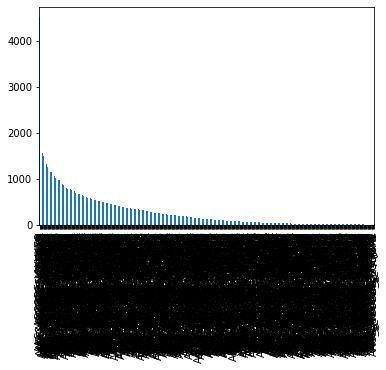

In [76]:
policy_data.AAG_AGCODE.value_counts().plot(kind='bar')

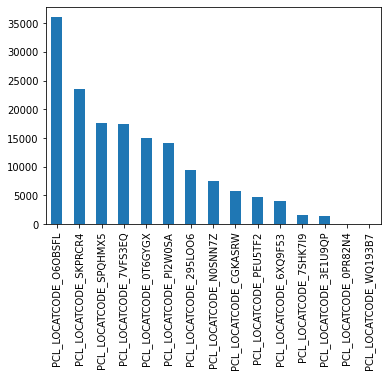

In [77]:
policy_data.PCL_LOCATCODE.value_counts().plot(kind='bar')

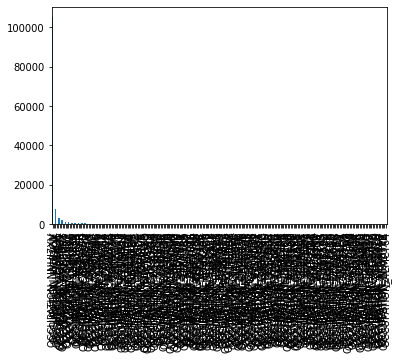

In [78]:
policy_data.OCCUPATION.value_counts().plot(kind='bar')

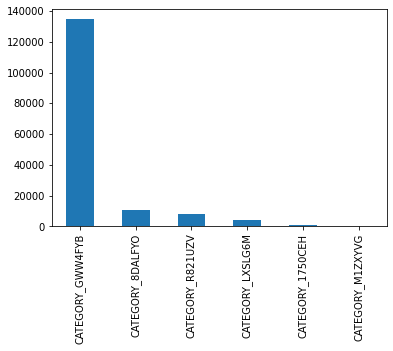

In [79]:
policy_data.CATEGORY.value_counts().plot(kind='bar')

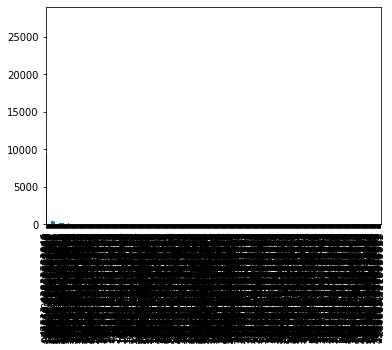

In [73]:
policy_data.NPR_SUMASSURED.value_counts().plot(kind='bar')

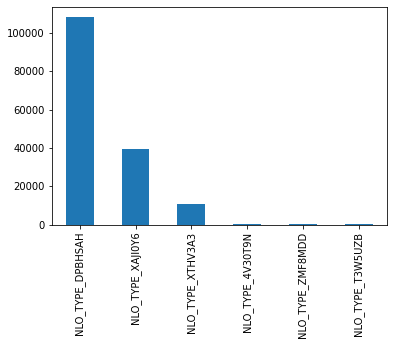

In [74]:
policy_data.NLO_TYPE.value_counts().plot(kind='bar')

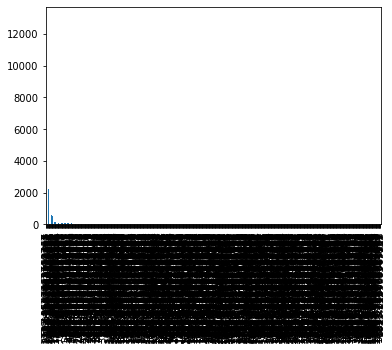

In [75]:
policy_data.NLO_AMOUNT.value_counts().plot(kind='bar')

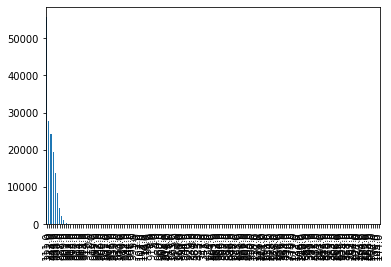

In [70]:
policy_data.NSP_SUBPROPOSAL.value_counts().plot(kind='bar')

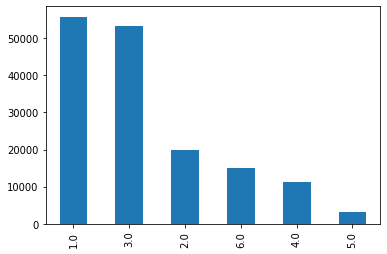

In [71]:
policy_data.CLF_LIFECD.value_counts().plot(kind='bar')

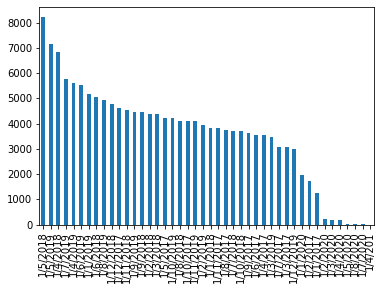

In [67]:
policy_data.NP2_EFFECTDATE.value_counts().plot(kind='bar')

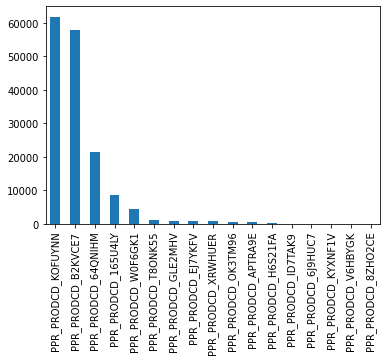

In [68]:
policy_data.PPR_PRODCD.value_counts().plot(kind='bar')

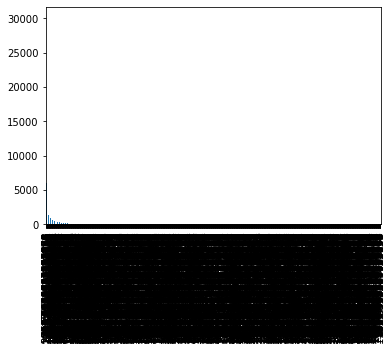

In [69]:
policy_data.NPR_PREMIUM.value_counts().plot(kind='bar')

In [80]:
policy_data = policy_data.drop(columns=['NPR_PREMIUM', 'NSP_SUBPROPOSAL', 'NPH_LASTNAME', 'NPR_SUMASSURED', 'NLO_AMOUNT', 'OCCUPATION'])

In [81]:
policy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158412 entries, 0 to 158411
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Policy_ID       158412 non-null  object 
 1   NP2_EFFECTDATE  158412 non-null  object 
 2   PPR_PRODCD      158411 non-null  object 
 3   CLF_LIFECD      158411 non-null  float64
 4   NLO_TYPE        158411 non-null  object 
 5   AAG_AGCODE      158411 non-null  object 
 6   PCL_LOCATCODE   158411 non-null  object 
 7   CATEGORY        158411 non-null  object 
dtypes: float64(1), object(7)
memory usage: 9.7+ MB


In [84]:
policy_data.Policy_ID[0] == client_data.Policy_ID[0]

False

In [ ]:
# Convert target label to numerical Data
le = LabelEncoder()
train_data['bank_account'] = le.fit_transform(train_data['bank_account'])
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# Data visualisation 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

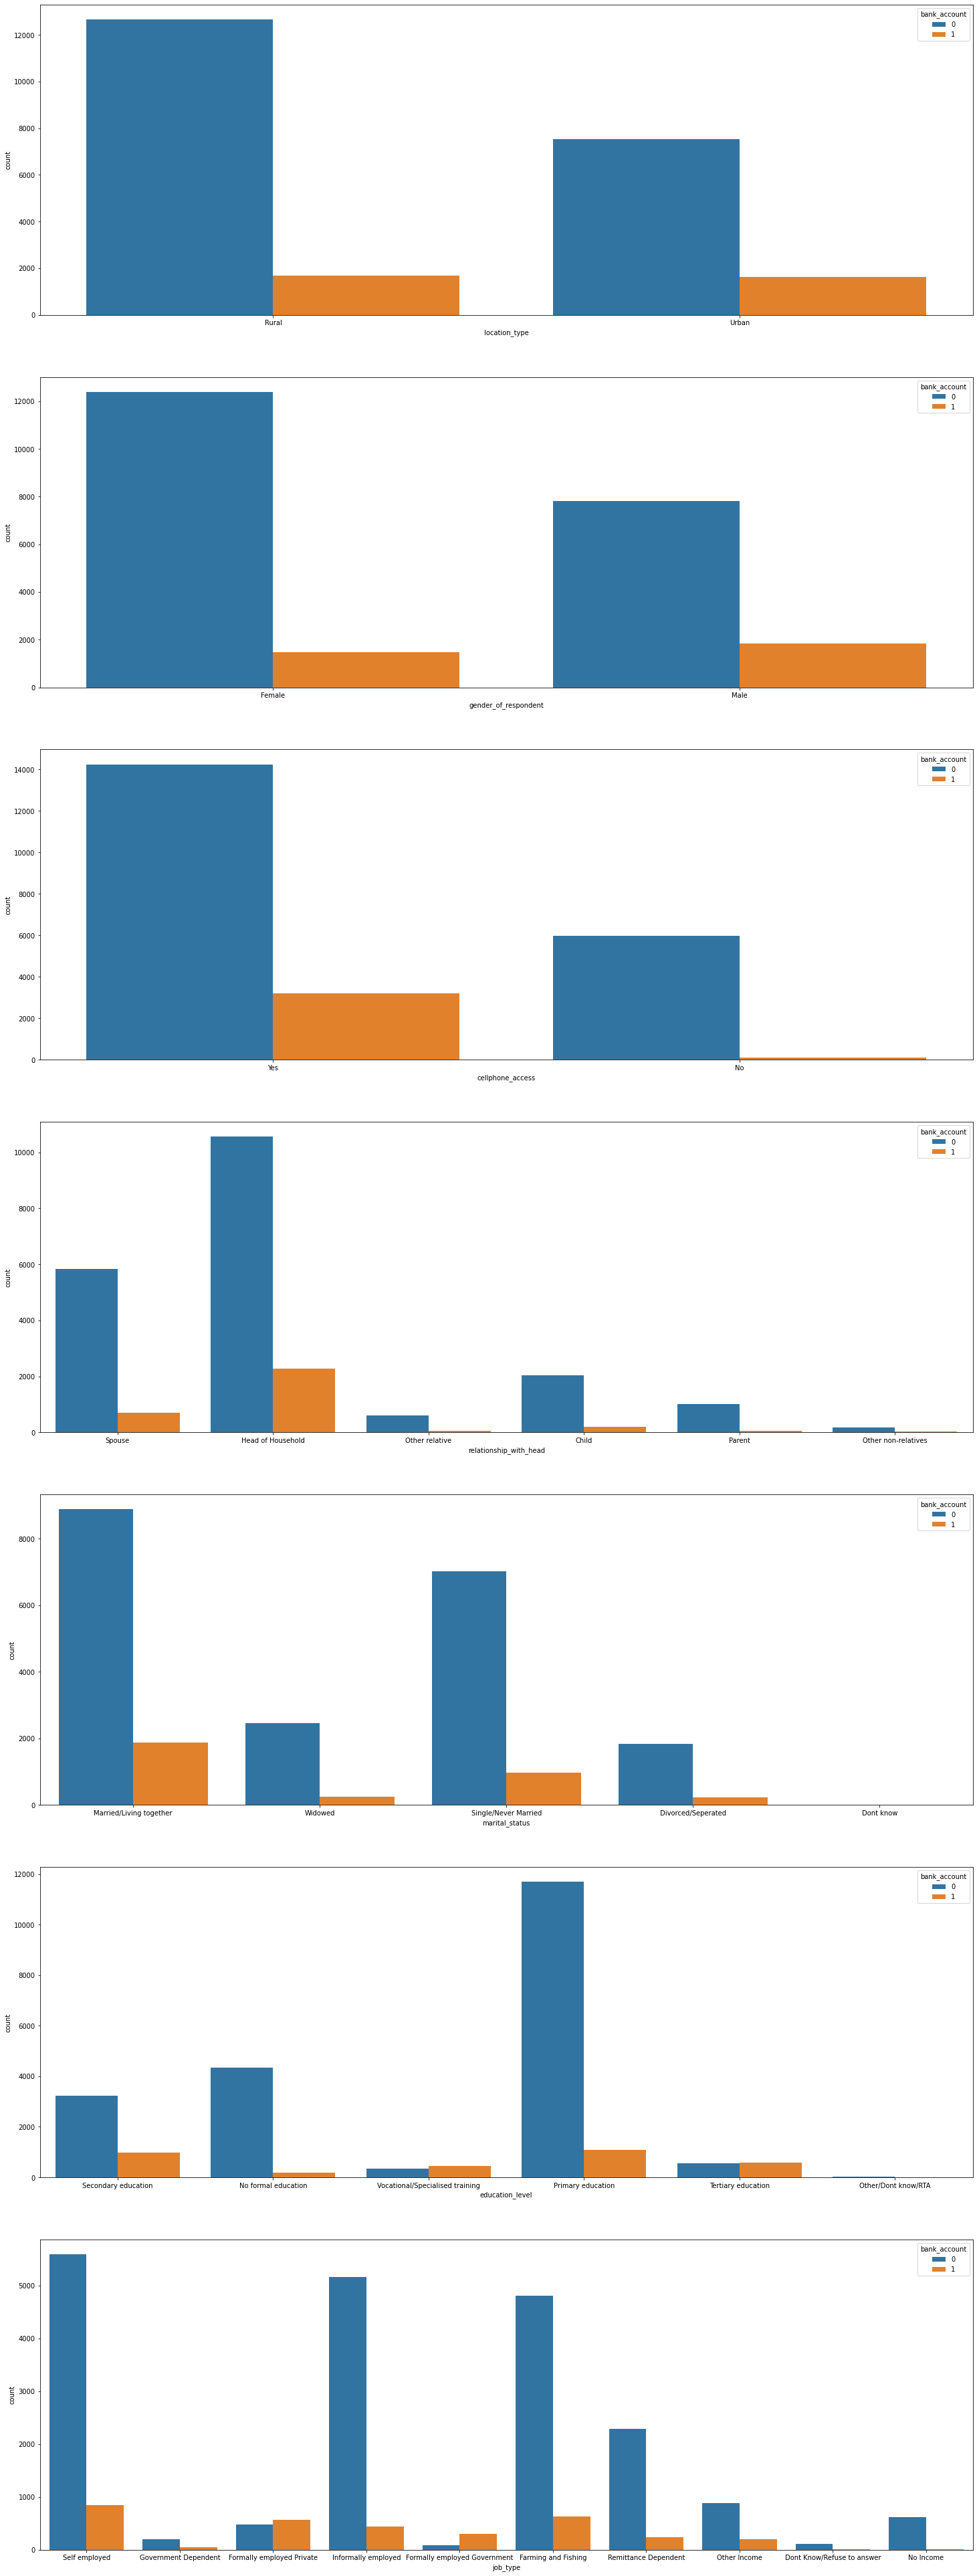

In [ ]:
f, axes = plt.subplots(7, 1, figsize=[25, 70])

sns.countplot('location_type', hue= 'bank_account', data=train_data, ax=axes[0])
sns.countplot('gender_of_respondent', hue= 'bank_account', data=train_data, ax=axes[1])
sns.countplot('cellphone_access', hue= 'bank_account', data=train_data, ax=axes[2])
sns.countplot('relationship_with_head', hue= 'bank_account', data=train_data, ax=axes[3])
sns.countplot('marital_status', hue= 'bank_account', data=train_data, ax=axes[4])
sns.countplot('education_level', hue= 'bank_account', data=train_data, ax=axes[5])
sns.countplot('job_type', hue= 'bank_account', data=train_data, ax=axes[6])

In [ ]:
train_data['year_'] = train_data['year']
test_data['year_'] = test_data['year']

# Data preprocessing 
## Convert the some numerical labels from integer to float

In [ ]:
float_array = train_data[['household_size', 'age_of_respondent', 'year_']].values.astype(float)
float_array = test_data[['household_size', 'age_of_respondent', 'year_']].values.astype(float)

In [ ]:

# convert categorical features to numerical features
# categorical features to be converted by One Hot Encoding
train_data['country_'] = train_data['country']
test_data['country_'] = test_data['country']

categ = ['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'country_']
# One Hot Encoding conversion
train_data = pd.get_dummies(train_data, prefix_sep='_', columns = categ)

test_data = pd.get_dummies(test_data, prefix_sep='_', columns = categ)

# Labelncoder conversion
train_data['location_type'] = le.fit_transform(train_data['location_type'])
train_data['cellphone_access'] = le.fit_transform(train_data['cellphone_access'])
train_data['gender_of_respondent'] = le.fit_transform(train_data['gender_of_respondent'])


test_data['location_type'] = le.fit_transform(test_data['location_type'])
test_data['cellphone_access'] = le.fit_transform(test_data['cellphone_access'])
test_data['gender_of_respondent'] = le.fit_transform(test_data['gender_of_respondent'])


train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,2018,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,2018,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,2018,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,2018,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,2018,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_6056,1,1,3,30,1,2018,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,Kenya,2018,uniqueid_6060,1,1,7,51,1,2018,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_6065,0,0,3,77,0,2018,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,Kenya,2018,uniqueid_6072,0,0,6,39,0,2018,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,Kenya,2018,uniqueid_6073,1,0,3,16,1,2018,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


#Separate training features from target

In [ ]:
X_train = train_data.drop(['year', 'uniqueid', 'bank_account', 'country'], axis=1)
y_train = train_data['bank_account']
X_test = test_data.drop(['year', 'uniqueid', 'country'], axis=1)

#Rescale X_train and X_test




In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.fit_transform(X_test)

In [ ]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,2018,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,2018,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,2018,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,2018,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,2018,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
X_train_rescaled.shape

(23524, 37)

# Feature selection

In [ ]:
model_selection = SelectKBest(score_func=f_classif, k=20)
fit = model_selection.fit(X_train_rescaled, y_train)
X_train_final = fit.transform(X_train_rescaled)
X_test_final = fit.transform(X_test_rescaled)
print("train data shape", X_train_final.shape)
print("test data shape", X_test_final.shape)

train data shape (23524, 20)
test data shape (10086, 20)


# Split train_data

In [ ]:
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(X_train_final, y_train, stratify = y_train, test_size = 0.2, random_state=42)

In [ ]:
# #import XGBClassifier
# from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Optimize model paramaters 
parameters = {
              # 'base_estimator__max_depth':[i for i in range(2,11,2)],
              # 'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}
model = GridSearchCV(model, parameters,verbose=3,scoring='f1',n_jobs=-1)
model.fit(X_Train, y_Train)
print(model.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.1min finished


{'learning_rate': 0.1, 'n_estimators': 1000}


In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score

# # fit and Evaluate model
# my_model3 = XGBClassifier(min_child_weight = 5, gamma = 0.5, subsample = 0.8, colsample_bytree = 0.6, max_depth = 5)
# my_model3.fit(X_Train, y_Train)
# y_pred = my_model3.predict(X_val)

# # Get error rate
# print("Error rate of Random Forest classifier: ", 1 - accuracy_score(y_val, y_pred))

# # Get confusion matrix
# confusion_matrix(y_pred, y_val)

In [ ]:
#Implementing k-fold cross validation
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

k = 50
kf = KFold(n_splits=k, random_state=None)
model = XGBClassifier(colsample_bytree = 0.6, gamma = 2, max_depth = 4, min_child_weight = 10, subsample = 0.8)
# model = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 500)

acc_score = []
# i=0
print(y_train.shape)
for train_index , test_index in kf.split(X_train_rescaled):
    X_train_kf , X_test_kf = X_train_final[train_index,:],X_train_final[test_index,:]
    y_train_kf , y_test_kf = y_train[train_index] , y_train[test_index]
     
    model.fit(X_train_kf,y_train_kf)
    pred_values = model.predict(X_test_kf)
     
    acc = accuracy_score(pred_values , y_test_kf)
    acc_score.append(acc)
    # i+=1
    # if i == 4:
    #   break
avg_acc_score = sum(acc_score)/k
# print(model.best_params_)
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

In [ ]:
# Get the predicted result for the test Data
test_data.bank_account = model.predict(X_test_final)

In [ ]:
# create submission DataFrame
submission_df3 = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],

"bank_account": test_data.bank_account})

In [ ]:
submission_df3.head()

In [ ]:

# Create submission csv file
submission_df3.to_csv('submission.csv', index = False)